In [189]:
import numpy  as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer



In [190]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [191]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [192]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [193]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [194]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [195]:
def data_info(df):
    num_cols=df.select_dtypes(['number']).columns
    cat_cols=df.select_dtypes(['object']).columns
    print("---------------------------")
    print("numerical columns:",num_cols)
    print(df[num_cols].isna().sum())
    print("---------------------------")
    print("categorical columns:",cat_cols)
    print(df[cat_cols].isna().sum())
    
    for col in cat_cols:
        if len(df[cat_cols].value_counts())>10:
            print(col,"has more than 10 category")
        else:
            print(df[cat_cols].value_counts())
    print("--------------------------- End")
    
data_info(train)
data_info(test)

---------------------------
numerical columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64
---------------------------
categorical columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64
Name has more than 10 category
Sex has more than 10 category
Ticket has more than 10 category
Cabin has more than 10 category
Embarked has more than 10 category
--------------------------- End
---------------------------
numerical columns: Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64
---------------------------
categorical columns: Index(['N

In [196]:
Numeric_cols=train.select_dtypes(include=['number']).columns.tolist()
categorical_cols=train.select_dtypes(include=['object','category']).columns.tolist()


In [197]:
test=test.drop(columns='PassengerId',axis=1)
train=train.drop(columns='PassengerId',axis=1)



In [198]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **fill Nan values**

In [199]:
train.isna().sum(),test.isna().sum()

(Survived      0
 Pclass        0
 Name          0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Ticket        0
 Fare          0
 Cabin       687
 Embarked      2
 dtype: int64,
 Pclass        0
 Name          0
 Sex           0
 Age          86
 SibSp         0
 Parch         0
 Ticket        0
 Fare          1
 Cabin       327
 Embarked      0
 dtype: int64)

In [200]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [201]:
def fill_nan(df):
    imputer_med = SimpleImputer(missing_values=np.nan, strategy="median")
    imputer_med.fit(df[['Age']])  
    df['Age'] = imputer_med.transform(df[['Age']])

    imputer_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
    imputer_mean.fit(df[['Fare']]) 
    df['Fare'] = imputer_mean.transform(df[['Fare']])

    return df


train=fill_nan(train)
test=fill_nan(test)



In [202]:
def fill_nan_cat(df):
    cat_cols=['Embarked']
    imputer_cat=SimpleImputer( strategy="most_frequent")
    imputer_cat.fit(df[cat_cols])
    df[cat_cols]=imputer_cat.transform((df[cat_cols]))

    return df
train=fill_nan_cat(train)
test=fill_nan_cat(test)

In [203]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [204]:
if train['Cabin'].isna().sum()>0:
    train['Cabin']=train['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
if test['Cabin'].isna().sum()>0:
    test['Cabin']=test['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [205]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1,C


In [206]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,0,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,1,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,0,S


In [207]:
def cleaning_data(df):
    df['Title']=df['Name'].apply(lambda x:(x.split(",")[1]).split('.')[0])
    df['Family_member']=df['SibSp']+df['Parch']
    df=df.drop(columns=['Name','Ticket','SibSp','Parch'],axis=1)
    
    return df
    
train=cleaning_data(train)
test=cleaning_data(test)
train

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_member
0,0,3,male,22.0,7.2500,0,S,Mr,1
1,1,1,female,38.0,71.2833,1,C,Mrs,1
2,1,3,female,26.0,7.9250,0,S,Miss,0
3,1,1,female,35.0,53.1000,1,S,Mrs,1
4,0,3,male,35.0,8.0500,0,S,Mr,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0,S,Rev,0
887,1,1,female,19.0,30.0000,1,S,Miss,0
888,0,3,female,28.0,23.4500,0,S,Miss,3
889,1,1,male,26.0,30.0000,1,C,Mr,0


In [208]:
train['Title'].isna().sum(),test['Title'].isna().sum()

(0, 0)

In [209]:
train['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [210]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    object 
 3   Age            891 non-null    float64
 4   Fare           891 non-null    float64
 5   Cabin          891 non-null    int64  
 6   Embarked       891 non-null    object 
 7   Title          891 non-null    object 
 8   Family_member  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [211]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Sex            418 non-null    object 
 2   Age            418 non-null    float64
 3   Fare           418 non-null    float64
 4   Cabin          418 non-null    int64  
 5   Embarked       418 non-null    object 
 6   Title          418 non-null    object 
 7   Family_member  418 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


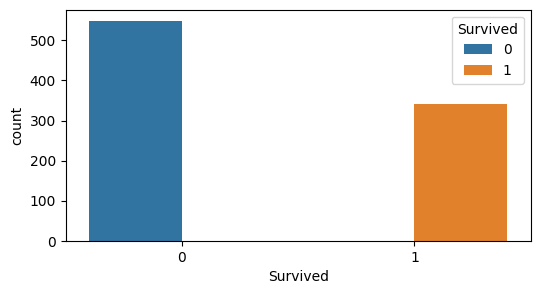

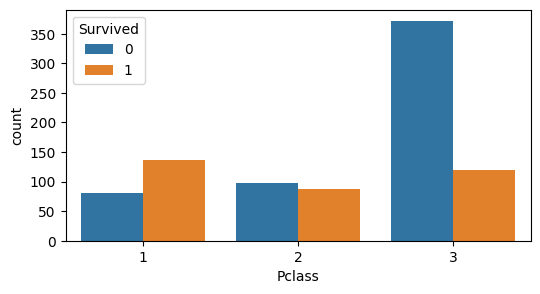

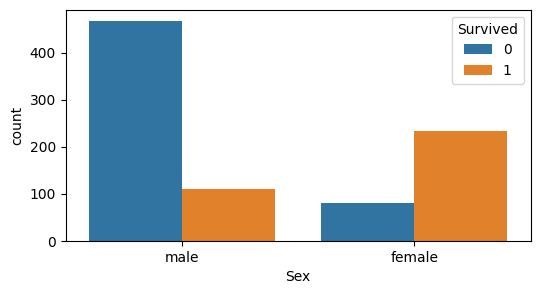

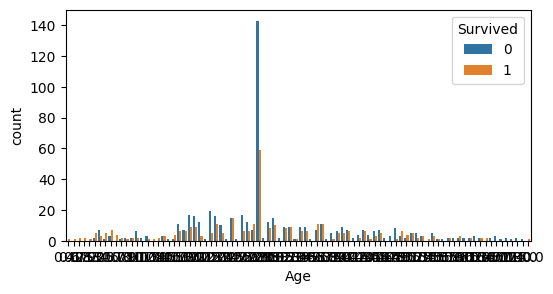

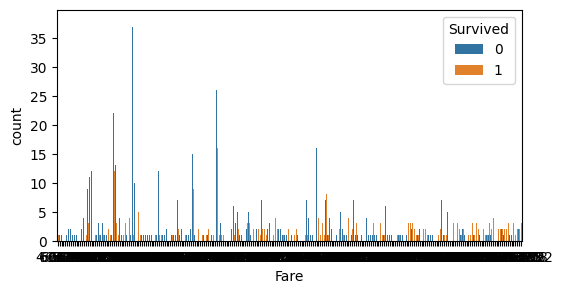

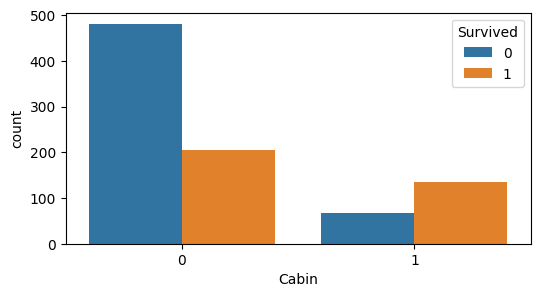

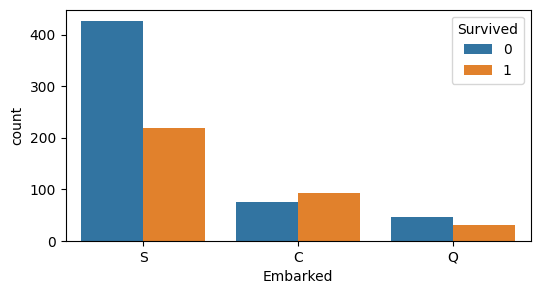

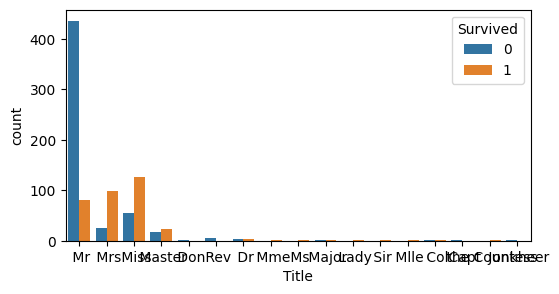

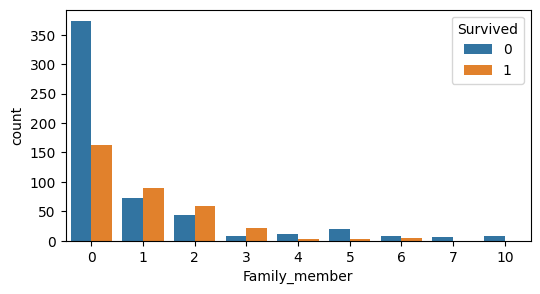

In [212]:

def get_plot(df):
    cols=df.columns
    for col in cols:
        plt.figure(figsize=(6,3))
        sns.countplot(x=col, data=df, hue = 'Survived')
        plt.show()
get_plot(train)


In [213]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    object 
 3   Age            891 non-null    float64
 4   Fare           891 non-null    float64
 5   Cabin          891 non-null    int64  
 6   Embarked       891 non-null    object 
 7   Title          891 non-null    object 
 8   Family_member  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


## **Data Encoding**

## **1st try**

In [214]:
train_ds=train
test_ds=test
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    object 
 3   Age            891 non-null    float64
 4   Fare           891 non-null    float64
 5   Cabin          891 non-null    int64  
 6   Embarked       891 non-null    object 
 7   Title          891 non-null    object 
 8   Family_member  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [215]:
ohe=OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
data=ohe.fit_transform(train[['Sex']])
train=pd.concat([train,data], axis=1)
train=train.drop(columns='Sex', axis=1)

data=ohe.fit_transform(test[['Sex']])
test=pd.concat([test,data], axis=1)
test=test.drop(columns='Sex', axis=1)


ohe=OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
data=ohe.fit_transform(train[['Embarked']])
train=pd.concat([train,data], axis=1)
train=train.drop(columns='Embarked', axis=1)

data=ohe.fit_transform(test[['Embarked']])
test=pd.concat([test,data], axis=1)
test=test.drop(columns='Embarked', axis=1)

In [216]:
def replace_value(df):
    #df['Sex']=df['Sex'].replace({'female':1, 'male':2})
    df['Pclass']=df['Pclass'].replace({3:2, 2:1, 1:1})
    df['Embarked']=df['Embarked'].replace({'S':3, 'C':1,'Q':1})
    
    #freq encoding
    enc=df['Title'].value_counts(normalize=True).to_dict()
    df['Title']=df['Title'].map(enc)
    return df

train=replace_value(train)
test=replace_value(test)
train

/tmp/ipykernel_33/4051659743.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Embarked']=df['Embarked'].replace({'S':3, 'C':1,'Q':1})
/tmp/ipykernel_33/4051659743.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Embarked']=df['Embarked'].replace({'S':3, 'C':1,'Q':1})


,Survived,Pclass,Age,Fare,Cabin,Embarked,Title,Family_member,Sex_female,Sex_male
0,0,2,22.0,7.2500,0,3,0.580247,1,0.0,1.0
1,1,1,38.0,71.2833,1,1,0.140292,1,1.0,0.0
2,1,2,26.0,7.9250,0,3,0.204265,0,1.0,0.0
3,1,1,35.0,53.1000,1,3,0.140292,1,1.0,0.0
4,0,2,35.0,8.0500,0,3,0.580247,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,13.0000,0,3,0.006734,0,0.0,1.0
887,1,1,19.0,30.0000,1,3,0.204265,0,1.0,0.0
888,0,2,28.0,23.4500,0,3,0.204265,3,1.0,0.0
889,1,1,26.0,30.0000,1,1,0.580247,0,0.0,1.0


In [217]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Age            891 non-null    float64
 3   Fare           891 non-null    float64
 4   Cabin          891 non-null    int64  
 5   Embarked       891 non-null    int64  
 6   Title          891 non-null    float64
 7   Family_member  891 non-null    int64  
 8   Sex_female     891 non-null    float64
 9   Sex_male       891 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 69.7 KB


In [218]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Age            418 non-null    float64
 2   Fare           418 non-null    float64
 3   Cabin          418 non-null    int64  
 4   Embarked       418 non-null    int64  
 5   Title          418 non-null    float64
 6   Family_member  418 non-null    int64  
 7   Sex_female     418 non-null    float64
 8   Sex_male       418 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 29.5 KB


In [219]:
correlation_matrix = train.corr()

# Assuming 'target_column' is the name of your target variable column
target_correlation = correlation_matrix['Survived']

print(target_correlation)

Survived         1.000000
Pclass          -0.322308
Age             -0.064910
Fare             0.257307
Cabin            0.316912
Embarked        -0.149683
Title           -0.523954
Family_member    0.016639
Sex_female       0.543351
Sex_male        -0.543351
Name: Survived, dtype: float64


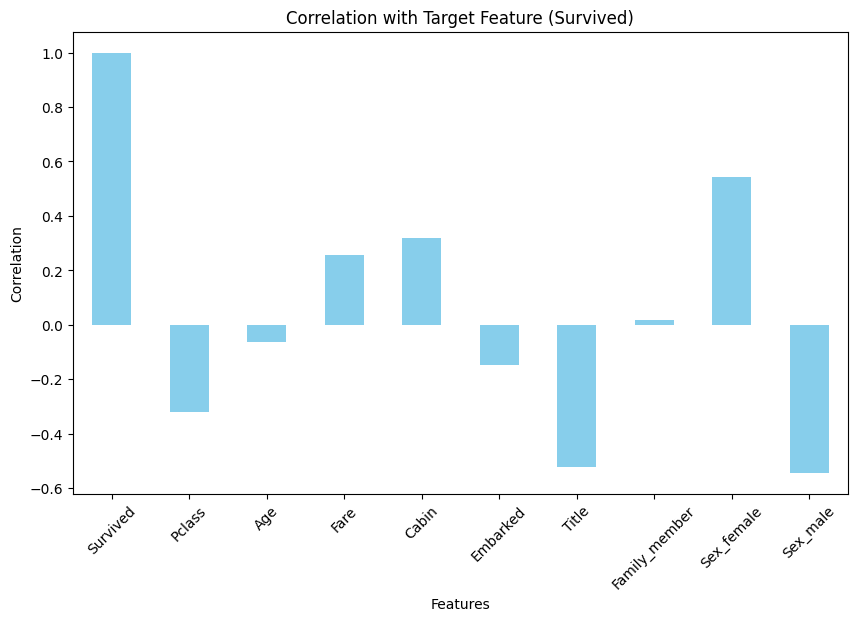

In [220]:

target=train['Survived']
correlation_with_target = train.corrwith(target)

# Plot the correlation values
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Feature (Survived)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

In [221]:
base_cols=test.columns
def data_prep(df,base_cols):
    
    df['mean']=df[base_cols].mean(axis=1)
    df['std']=df[base_cols].std(axis=1)
    df['min']=df[base_cols].min(axis=1)
    df['max']=df[base_cols].max(axis=1)
    df['range']=df['max']-df['min']
    df['ptp']=df[base_cols].values.ptp(axis=1)
    df['q25']=df[base_cols].quantile(0.25,axis=1)
    df['q75']=df[base_cols].quantile(0.75,axis=1)
    return df
    
train=data_prep(train,base_cols)
test=data_prep(test,base_cols)

In [222]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Age            891 non-null    float64
 3   Fare           891 non-null    float64
 4   Cabin          891 non-null    int64  
 5   Embarked       891 non-null    int64  
 6   Title          891 non-null    float64
 7   Family_member  891 non-null    int64  
 8   Sex_female     891 non-null    float64
 9   Sex_male       891 non-null    float64
 10  mean           891 non-null    float64
 11  std            891 non-null    float64
 12  min            891 non-null    float64
 13  max            891 non-null    float64
 14  range          891 non-null    float64
 15  ptp            891 non-null    float64
 16  q25            891 non-null    float64
 17  q75            891 non-null    float64
dtypes: float64

In [223]:
train

,Survived,Pclass,Age,Fare,Cabin,Embarked,Title,Family_member,Sex_female,Sex_male,mean,std,min,max,range,ptp,q25,q75
0,0,2,22.0,7.2500,0,3,0.580247,1,0.0,1.0,4.092250,7.081495,0.0,22.0000,22.0000,22.0000,0.580247,3.0
1,1,1,38.0,71.2833,1,1,0.140292,1,1.0,0.0,12.713732,25.188235,0.0,71.2833,71.2833,71.2833,1.000000,1.0
2,1,2,26.0,7.9250,0,3,0.204265,0,1.0,0.0,4.458807,8.469937,0.0,26.0000,26.0000,26.0000,0.000000,3.0
3,1,1,35.0,53.1000,1,3,0.140292,1,1.0,0.0,10.582255,19.524896,0.0,53.1000,53.1000,53.1000,1.000000,3.0
4,0,2,35.0,8.0500,0,3,0.580247,0,0.0,1.0,5.514472,11.349309,0.0,35.0000,35.0000,35.0000,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,13.0000,0,3,0.006734,0,0.0,1.0,5.000748,9.246166,0.0,27.0000,27.0000,27.0000,0.000000,3.0
887,1,1,19.0,30.0000,1,3,0.204265,0,1.0,0.0,6.133807,10.807575,0.0,30.0000,30.0000,30.0000,0.204265,3.0
888,0,2,28.0,23.4500,0,3,0.204265,3,1.0,0.0,6.739363,10.886764,0.0,28.0000,28.0000,28.0000,0.204265,3.0
889,1,1,26.0,30.0000,1,1,0.580247,0,0.0,1.0,6.731139,12.106623,0.0,30.0000,30.0000,30.0000,0.580247,1.0


In [224]:
correlation_matrix = train.corr()

# Assuming 'target_column' is the name of your target variable column
target_correlation = correlation_matrix['Survived']

print(target_correlation)

Survived         1.000000
Pclass          -0.322308
Age             -0.064910
Fare             0.257307
Cabin            0.316912
Embarked        -0.149683
Title           -0.523954
Family_member    0.016639
Sex_female       0.543351
Sex_male        -0.543351
mean             0.222055
std              0.208394
min                   NaN
max              0.199310
range            0.199310
ptp              0.199310
q25              0.202224
q75             -0.180739
Name: Survived, dtype: float64


## **2nd TRy**

In [225]:
target=train['Survived']

train=train.drop(columns='Survived',axis=1)

## **Normalization (Min-Max scaling):

Scales the data between a specified range (usually 0 and 1).**

In [226]:
train_data_col=train.columns
test_data_col=test.columns

scaler=MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

train = pd.DataFrame (train , columns=[train_data_col])
test  = pd.DataFrame (test , columns=[test_data_col])

In [228]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


X_train=train
y_train=target
X_test=test

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define classification models
models = [
    ('AdaBoost', AdaBoostClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('CatBoost', CatBoostClassifier())
]

# Define empty dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Loop through each model
for name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the validation data
    y_pred = model.predict(X_val)
    
    # Calculate evaluation metrics
    accuracy_scores[name] = accuracy_score(y_val, y_pred)
    precision_scores[name] = precision_score(y_val, y_pred)
    recall_scores[name] = recall_score(y_val, y_pred)
    f1_scores[name] = f1_score(y_val, y_pred)

# Print evaluation metrics
for name, _ in models:
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_scores[name]}")
    print(f"Precision: {precision_scores[name]}")
    print(f"Recall: {recall_scores[name]}")
    print(f"F1 Score: {f1_scores[name]}")
    print()

Learning rate set to 0.008911
0:	learn: 0.6864453	total: 61.7ms	remaining: 1m 1s
1:	learn: 0.6808546	total: 64.9ms	remaining: 32.4s
2:	learn: 0.6750894	total: 67.3ms	remaining: 22.4s
3:	learn: 0.6701332	total: 68.4ms	remaining: 17s
4:	learn: 0.6648616	total: 70.6ms	remaining: 14.1s
5:	learn: 0.6595399	total: 72.6ms	remaining: 12s
6:	learn: 0.6545060	total: 74.6ms	remaining: 10.6s
7:	learn: 0.6493794	total: 76.5ms	remaining: 9.49s
8:	learn: 0.6451367	total: 78.5ms	remaining: 8.64s
9:	learn: 0.6404941	total: 80.4ms	remaining: 7.96s
10:	learn: 0.6361515	total: 82.2ms	remaining: 7.39s
11:	learn: 0.6322624	total: 84.1ms	remaining: 6.92s
12:	learn: 0.6270752	total: 86ms	remaining: 6.53s
13:	learn: 0.6225683	total: 87.9ms	remaining: 6.19s
14:	learn: 0.6195544	total: 88.7ms	remaining: 5.83s
15:	learn: 0.6161278	total: 90.7ms	remaining: 5.58s
16:	learn: 0.6124964	total: 92.2ms	remaining: 5.33s
17:	learn: 0.6094130	total: 93.7ms	remaining: 5.11s
18:	learn: 0.6050587	total: 94.8ms	remaining: 4.9s

In [229]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# Create a CatBoost classifier
cat = CatBoostClassifier(verbose=0)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=cat, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}
Best Score: 0.8384418398502905


In [230]:
from catboost import CatBoostClassifier

# Define the best parameters
best_params = {
    'iterations':300,  
    'learning_rate': 0.05,
    'depth': 6
}

best_cat = CatBoostClassifier(verbose=0, **best_params)

best_cat.fit(X_train, y_train)

y_pred = best_cat.predict(test)

In [231]:
submission=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission=submission.drop(columns=['Survived'],axis=1)
submission['Survived']=y_pred
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


submission.to_csv('Titanic_Machine_Learning_from_Disaster.csv',index=False)


In [232]:
submission.to_csv('Submission.csv', index=False)